In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline 

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV
from xgboost import XGBClassifier

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include= ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train_df.groupby(["Pclass"], as_index = False)["Survived"].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
train_df.groupby(["Sex"], as_index = False)["Survived"].mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
train_df.groupby(["SibSp"], as_index = False)["Survived"].mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
train_df.groupby(["Parch"], as_index = False)["Survived"].mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [11]:
train_df["Family_size"] = train_df["Parch"] + train_df["SibSp"] + 1
test_df["Family_size"] = train_df["Parch"] + train_df["SibSp"] + 1

In [12]:
train_df.groupby(["Family_size"], as_index = False)["Survived"].mean()

,Family_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [12]:
family_map = {1: 'alone', 2: 'small', 3: 'small', 4: 'small', 5: 'medium', 6: 'medium', 7: 'large', 8: 'large', 11: 'large'}
train_df["Family_size_grouped"] = train_df["Family_size"].map(family_map)
test_df["Family_size_grouped"] = test_df["Family_size"].map(family_map)

In [13]:
train_df.groupby(["Family_size_grouped"], as_index = False)["Survived"].mean()

,Family_size_grouped,Survived
0,alone,0.303538
1,large,0.160000
2,medium,0.162162
3,small,0.578767


In [14]:
train_df.groupby(["Embarked"], as_index = False)["Survived"].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


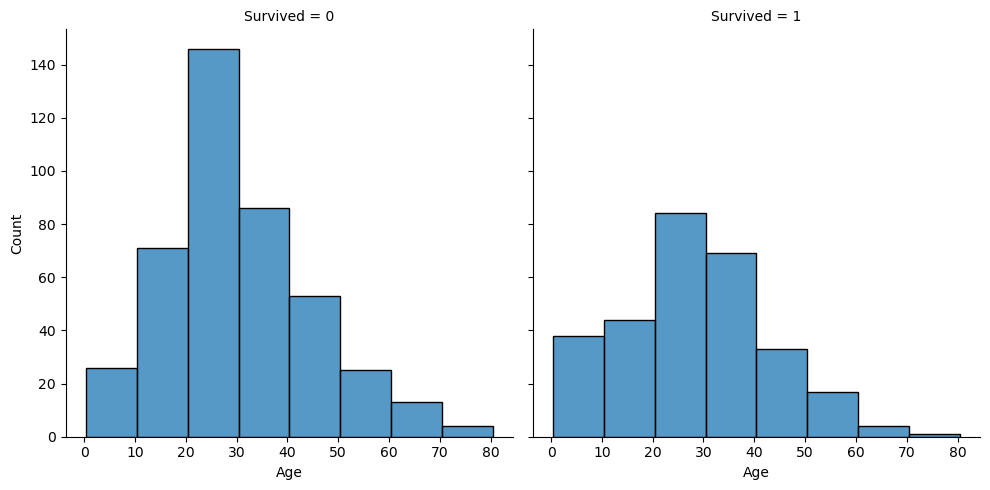

In [25]:
sns.displot(train_df, x= 'Age', col = "Survived", binwidth = 10, height = 5)

In [15]:
train_df["Age_cut"] = pd.qcut(train_df["Age"], 8)
test_df["Age_cut"] = pd.qcut(test_df["Age"], 8)

In [16]:
train_df.groupby(["Age_cut"], as_index = False)["Survived"].mean()

,Age_cut,Survived
0,"(0.419, 16.0]",0.550000
1,"(16.0, 20.125]",0.341772
2,"(20.125, 24.0]",0.367347
3,"(24.0, 28.0]",0.352941
4,"(28.0, 32.312]",0.416667
5,"(32.312, 38.0]",0.450549
6,"(38.0, 47.0]",0.329545
7,"(47.0, 80.0]",0.415730


In [17]:
train_df.loc[train_df["Age"] <= 16, "Age"] = 0
train_df.loc[(train_df["Age"] > 16) & (train_df["Age"] <= 20.125), "Age"] = 1
train_df.loc[(train_df["Age"] > 20.125) & (train_df["Age"] <= 24.0), "Age"] = 2
train_df.loc[(train_df["Age"] > 24.0) & (train_df["Age"] <=  28.0), "Age"] = 3
train_df.loc[(train_df["Age"] > 28.0) & (train_df["Age"] <= 32.312), "Age"] = 4
train_df.loc[(train_df["Age"] > 32.312) & (train_df["Age"] <= 38.0), "Age"] = 5
train_df.loc[(train_df["Age"] > 38.0) & (train_df["Age"] <= 47.0), "Age"] = 6
train_df.loc[(train_df["Age"] > 47.0) & (train_df["Age"] <= 80.0), "Age"] = 7
train_df.loc[train_df["Age"] > 80.0, "Age"]

test_df.loc[test_df["Age"] <= 16, "Age"] = 0
test_df.loc[(test_df["Age"] > 16) & (test_df["Age"] <= 20.125), "Age"] = 1
test_df.loc[(test_df["Age"] > 20.125) & (test_df["Age"] <= 24.0), "Age"] = 2
test_df.loc[(test_df["Age"] > 24.0) & (test_df["Age"] <=  28.0), "Age"] = 3
test_df.loc[(test_df["Age"] > 28.0) & (test_df["Age"] <= 32.312), "Age"] = 4
test_df.loc[(test_df["Age"] > 32.312) & (test_df["Age"] <= 38.0), "Age"] = 5
test_df.loc[(test_df["Age"] > 38.0) & (test_df["Age"] <= 47.0), "Age"] = 6
test_df.loc[(test_df["Age"] > 47.0) & (test_df["Age"] <= 80.0), "Age"] = 7
test_df.loc[test_df["Age"] > 80.0, "Age"]

Series([], Name: Age, dtype: float64)

In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_size_grouped,Age_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,2,small,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,71.2833,C85,C,2,small,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,alone,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,53.1000,C123,S,2,small,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,8.0500,NaN,S,1,alone,"(32.312, 38.0]"


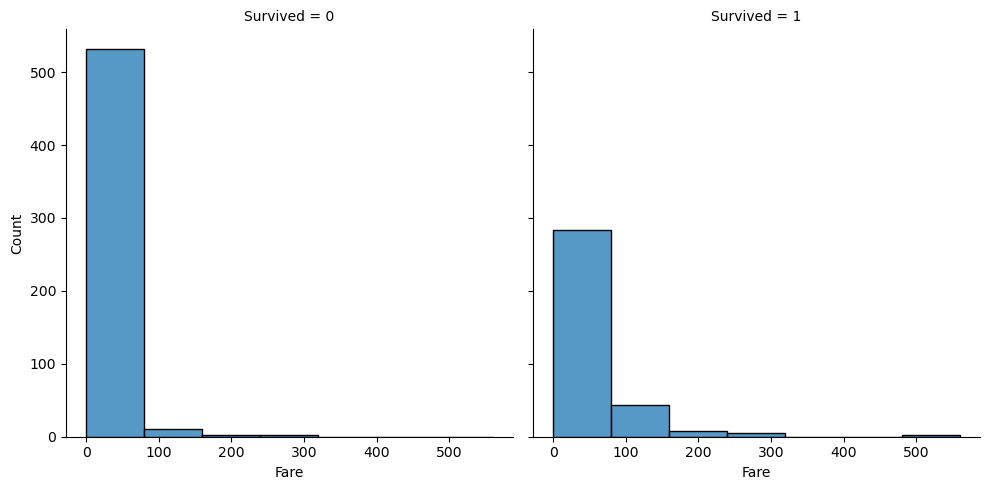

In [20]:
sns.displot(train_df, x= 'Fare', col = "Survived", binwidth = 80, height = 5)

In [19]:
train_df["Fare_cut"] = pd.qcut(train_df["Fare"], 6)
test_df["Fare_cut"] = pd.qcut(test_df["Fare"], 6)

In [20]:
train_df.groupby(["Fare_cut"], as_index = False)["Survived"].mean()

,Fare_cut,Survived
0,"(-0.001, 7.775]",0.205128
1,"(7.775, 8.662]",0.190789
2,"(8.662, 14.454]",0.366906
3,"(14.454, 26.0]",0.436242
4,"(26.0, 52.369]",0.417808
5,"(52.369, 512.329]",0.697987


In [21]:
train_df.loc[train_df["Fare"] <= 7.775, "Fare"] = 0
train_df.loc[(train_df["Fare"] >  7.775) & (train_df["Fare"] <= 8.662), "Fare"] = 1
train_df.loc[(train_df["Fare"] > 8.662) & (train_df["Fare"] <= 14.454), "Fare"] = 2
train_df.loc[(train_df["Fare"] > 14.454) & (train_df["Fare"] <=  26.0), "Fare"] = 3
train_df.loc[(train_df["Fare"] > 26.0) & (train_df["Fare"] <= 52.369), "Fare"] = 4
train_df.loc[(train_df["Fare"] > 52.369) & (train_df["Fare"] <= 512.329), "Fare"] = 5
train_df.loc[train_df["Fare"] > 512.329, "Fare"]

test_df.loc[test_df["Fare"] <= 7.775, "Fare"] = 0
test_df.loc[(test_df["Fare"] >  7.775) & (test_df["Fare"] <= 8.662), "Fare"] = 1
test_df.loc[(test_df["Fare"] > 8.662) & (test_df["Fare"] <= 14.454), "Fare"] = 2
test_df.loc[(test_df["Fare"] > 14.454) & (test_df["Fare"] <=  26.0), "Fare"] = 3
test_df.loc[(test_df["Fare"] > 26.0) & (test_df["Fare"] <= 52.369), "Fare"] = 4
test_df.loc[(test_df["Fare"] > 52.369) & (test_df["Fare"] <= 512.329), "Fare"] = 5
test_df.loc[test_df["Fare"] > 512.329, "Fare"]

343    512.3292
Name: Fare, dtype: float64

In [22]:
train_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [23]:
train_df["Title"] = train_df["Name"].str.split(pat = ",", expand = True)[1].str.split(pat = ".", expand = True)[0].apply(lambda x: x.strip())
test_df["Title"] = test_df["Name"].str.split(pat = ",", expand = True)[1].str.split(pat = ".", expand = True)[0].apply(lambda x: x.strip())

In [24]:
train_df.groupby(["Title"], as_index = False)["Survived"].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [25]:
train_df["Title"] = train_df["Title"].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Don': 'Military',
    'Jonkheer': 'Noble',
    'Lady': 'Noble',
    'Mlle': 'Noble',
    'Mme': 'Noble',
    'Sir': 'Noble',
    'the Countess': 'Noble',
    'Ms': 'Noble'
    })

test_df["Title"] = test_df["Title"].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Don': 'Military',
    'Jonkheer': 'Noble',
    'Lady': 'Noble',
    'Mlle': 'Noble',
    'Mme': 'Noble',
    'Sir': 'Noble',
    'the Countess': 'Noble',
    'Ms': 'Noble'f
    })

In [26]:
train_df.groupby(["Title"], as_index = False)["Survived"].agg(['count','mean'])

,count,mean
Title,,
Dr,7,0.428571
Master,40,0.575000
Military,6,0.333333
Miss,182,0.697802
Mr,517,0.156673
Mrs,125,0.792000
Noble,8,0.875000
Rev,6,0.000000


In [27]:
train_df['Name_length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_length'] = test_df['Name'].apply(lambda x: len(x))

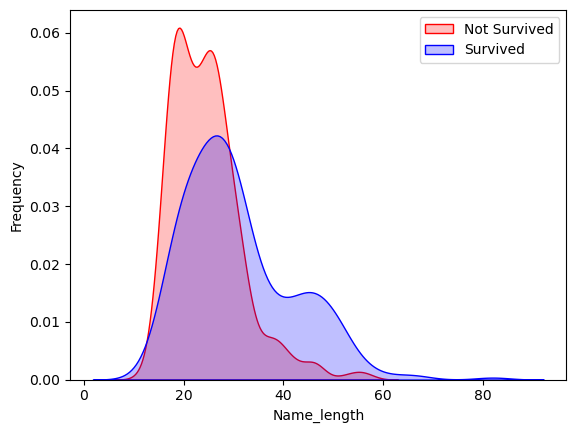

In [28]:
g = sns.kdeplot(train_df['Name_length'][(train_df['Survived']== 0) & (train_df['Name'].notnull())], color = 'Red', fill = True)
g = sns.kdeplot(train_df['Name_length'][(train_df['Survived']== 1) & (train_df['Name'].notnull())], ax = g, color = 'Blue', fill = True)
g.set_xlabel('Name_length')
g.set_ylabel('Frequency')
g= g.legend(["Not Survived", "Survived"])

In [29]:
train_df["Name_lengthGB"] = pd.qcut(train_df["Name_length"], 8)
test_df["Name_lengthGB"] = pd.qcut(test_df["Name_length"], 8)

In [30]:
train_df.groupby(["Name_lengthGB"], as_index = False)["Survived"].agg(['count','mean'])

,count,mean
Name_lengthGB,,
"(11.999, 18.0]",140,0.214286
"(18.0, 20.0]",103,0.252427
"(20.0, 23.0]",117,0.307692
"(23.0, 25.0]",98,0.346939
"(25.0, 27.25]",99,0.292929
"(27.25, 30.0]",112,0.428571
"(30.0, 38.0]",116,0.517241
"(38.0, 82.0]",106,0.745283


In [31]:
train_df.loc[train_df["Name_length"] <= 18.0, "Name_Size"] = 0
train_df.loc[(train_df["Name_length"] >  18.0) & (train_df["Name_length"] <= 20.0), "Name_Size"] = 1
train_df.loc[(train_df["Name_length"] > 20.0) & (train_df["Name_length"] <= 23.0), "Name_Size"] = 2
train_df.loc[(train_df["Name_length"] > 23.0) & (train_df["Name_length"] <=  25.0), "Name_Size"] = 3
train_df.loc[(train_df["Name_length"] > 25.0) & (train_df["Name_length"] <= 27.25), "Name_Size"] = 4
train_df.loc[(train_df["Name_length"] > 27.25) & (train_df["Name_length"] <= 30.0), "Name_Size"] = 5
train_df.loc[(train_df["Name_length"] > 30.0) & (train_df["Name_length"] <= 38.0), "Name_Size"] = 6
train_df.loc[(train_df["Name_length"] > 38.0) & (train_df["Name_length"] <= 82.0), "Name_Size"] = 7
train_df.loc[train_df["Name_length"] >  82.0, "Name_Size"]

test_df.loc[test_df["Name_length"] <= 18.0, "Name_Size"] = 0
test_df.loc[(test_df["Name_length"] >  18.0) & (test_df["Name_length"] <= 20.0), "Name_Size"] = 1
test_df.loc[(test_df["Name_length"] > 20.0) & (test_df["Name_length"] <= 23.0), "Name_Size"] = 2
test_df.loc[(test_df["Name_length"] > 23.0) & (test_df["Name_length"] <=  25.0), "Name_Size"] = 3
test_df.loc[(test_df["Name_length"] > 25.0) & (test_df["Name_length"] <= 27.25), "Name_Size"] = 4
test_df.loc[(test_df["Name_length"] > 27.25) & (test_df["Name_length"] <= 30.0), "Name_Size"] = 5
test_df.loc[(test_df["Name_length"] > 30.0) & (test_df["Name_length"] <= 38.0), "Name_Size"] = 6
test_df.loc[(test_df["Name_length"] > 38.0) & (test_df["Name_length"] <= 82.0), "Name_Size"] = 7
test_df.loc[test_df["Name_length"] >  82.0, "Name_Size"]

Series([], Name: Name_Size, dtype: float64)

In [32]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_size_grouped,Age_cut,Fare_cut,Title,Name_length,Name_lengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,NaN,S,2,small,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,C85,C,2,small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,NaN,S,1,alone,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,C123,S,2,small,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,NaN,S,1,alone,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0


In [33]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [34]:
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [35]:
train_df['TicketNumber']

0        21171
1        17599
2      3101282
3       113803
4       373450
        ...   
886     211536
887     112053
888       6607
889     111369
890     370376
Name: TicketNumber, Length: 891, dtype: object

In [38]:
train_df.groupby(["TicketNumber"], as_index = False)["Survived"].agg(['count','mean']).sort_values('count', ascending = False)

,count,mean
TicketNumber,,
347082,7,0.000000
2343,7,0.000000
1601,7,0.714286
2144,6,0.000000
347088,6,0.000000
...,...,...
2662,1,0.000000
2663,1,1.000000
2664,1,0.000000


In [36]:
train_df['TicketNumberCounts'] = train_df.groupby(["TicketNumber"])["TicketNumber"].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby("TicketNumber")["TicketNumber"].transform('count')

In [37]:
train_df.groupby(["TicketNumberCounts"], as_index = False)["Survived"].agg(['count','mean']).sort_values('count', ascending = False)

,count,mean
TicketNumberCounts,,
1,544,0.295956
2,188,0.569149
3,66,0.712121
4,44,0.500000
7,21,0.238095
6,18,0.000000
5,10,0.000000


In [38]:
train_df['Ticket'].str.split(pat = " ", expand = True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [39]:
train_df['TicketLocation'] = np.where(train_df['Ticket'].str.split(pat = " ", expand = True)[1].notna(), train_df['Ticket'].str.split(pat = " ", expand = True)[0].apply(lambda x: x.strip()), 'blank')
test_df['TicketLocation'] = np.where(test_df['Ticket'].str.split(pat = " ", expand = True)[1].notna(), test_df['Ticket'].str.split(pat = " ", expand = True)[0].apply(lambda x: x.strip()), 'blank')

In [40]:
train_df['TicketLocation'].value_counts()

blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: TicketLocation, dtype: int64

In [41]:
train_df["TicketLocation"] = train_df["TicketLocation"].replace({
    'SOTON/O.Q.': 'SOTON/OQ',
    'C.A.': 'CA',
    'CA.': 'CA',
    'SC/PARIS': 'SC/Paris',
    'S.C./PARIS': 'SC/Paris',
    'A/5.': 'A/5',
    'A/4.': 'A/4',
    'A.5.': 'A/5',
    'A./5.': 'A/5',
    'W./C.': 'W/C',
    })

test_df["TicketLocation"] = test_df["TicketLocation"].replace({
    'SOTON/O.Q.': 'SOTON/OQ',
    'C.A.': 'CA',
    'CA.': 'CA',
    'SC/PARIS': 'SC/Paris',
    'S.C./PARIS': 'SC/Paris',
    'A/5.': 'A/5',
    'A/4.': 'A/4',
    'A.5.': 'A/5',
    'A./5.': 'A/5',
    'W./C.': 'W/C'
    })

In [42]:
train_df.groupby(["TicketLocation"], as_index = False)["Survived"].agg(['count','mean']).sort_values('count', ascending = False)

,count,mean
TicketLocation,,
blank,665,0.383459
PC,60,0.650000
CA,41,0.341463
A/5,21,0.095238
SOTON/OQ,15,0.133333
STON/O,12,0.416667
SC/Paris,11,0.454545
W/C,10,0.100000
STON/O2.,6,0.500000


In [43]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [44]:
train_df.groupby(["Cabin"], as_index = False)["Survived"].agg(['count','mean']).sort_values('count', ascending = True)

,count,mean
Cabin,,
T,1,0.000000
G,4,0.500000
F,13,0.615385
A,15,0.466667
E,32,0.750000
D,33,0.757576
B,47,0.744681
C,59,0.593220
U,687,0.299854


In [45]:
train_df['Cabin_assigned'] = np.where(train_df['Cabin'] == 'U', 0, 1)
test_df['Cabin_assigned'] = np.where(test_df['Cabin'] == 'U', 0, 1)

In [46]:
train_df.groupby(["Cabin_assigned"], as_index = False)["Survived"].agg(['count','mean']).sort_values('count', ascending = False)

,count,mean
Cabin_assigned,,
0,687,0.299854
1,204,0.666667


In [47]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_cut,Fare_cut,Title,Name_length,Name_lengthGB,Name_Size,TicketNumber,TicketNumberCounts,TicketLocation,Cabin_assigned
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,0.0,...,"(20.125, 24.0]","(-0.001, 7.775]",Mr,23,"(20.0, 23.0]",2.0,21171,1,A/5,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,5.0,1,0,PC 17599,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,51,"(38.0, 82.0]",7.0,17599,1,PC,1
2,3,1,3,"Heikkinen, Miss. Laina",female,3.0,0,0,STON/O2. 3101282,1.0,...,"(24.0, 28.0]","(7.775, 8.662]",Miss,22,"(20.0, 23.0]",2.0,3101282,1,STON/O2.,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,5.0,1,0,113803,5.0,...,"(32.312, 38.0]","(52.369, 512.329]",Mrs,44,"(38.0, 82.0]",7.0,113803,2,blank,1
4,5,0,3,"Allen, Mr. William Henry",male,5.0,0,0,373450,1.0,...,"(32.312, 38.0]","(7.775, 8.662]",Mr,24,"(23.0, 25.0]",3.0,373450,1,blank,0


In [48]:
train_df.shape

(891, 24)

In [49]:
test_df.shape

(418, 23)

In [50]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    object  
 4   Sex                  891 non-null    object  
 5   Age                  714 non-null    float64 
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    object  
 9   Fare                 891 non-null    float64 
 10  Cabin                891 non-null    object  
 11  Embarked             889 non-null    object  
 12  Family_size          891 non-null    int64   
 13  Family_size_grouped  891 non-null    object  
 14  Age_cut              714 non-null    category
 15  Fare_cut             89

In [51]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          418 non-null    int64   
 1   Pclass               418 non-null    int64   
 2   Name                 418 non-null    object  
 3   Sex                  418 non-null    object  
 4   Age                  332 non-null    float64 
 5   SibSp                418 non-null    int64   
 6   Parch                418 non-null    int64   
 7   Ticket               418 non-null    object  
 8   Fare                 417 non-null    float64 
 9   Cabin                418 non-null    object  
 10  Embarked             418 non-null    object  
 11  Family_size          418 non-null    int64   
 12  Family_size_grouped  418 non-null    object  
 13  Age_cut              332 non-null    category
 14  Fare_cut             417 non-null    category
 15  Title                41

In [71]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)
train_df['Fare'].fillna(train_df['Fare'].mean(), inplace = True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace = True)

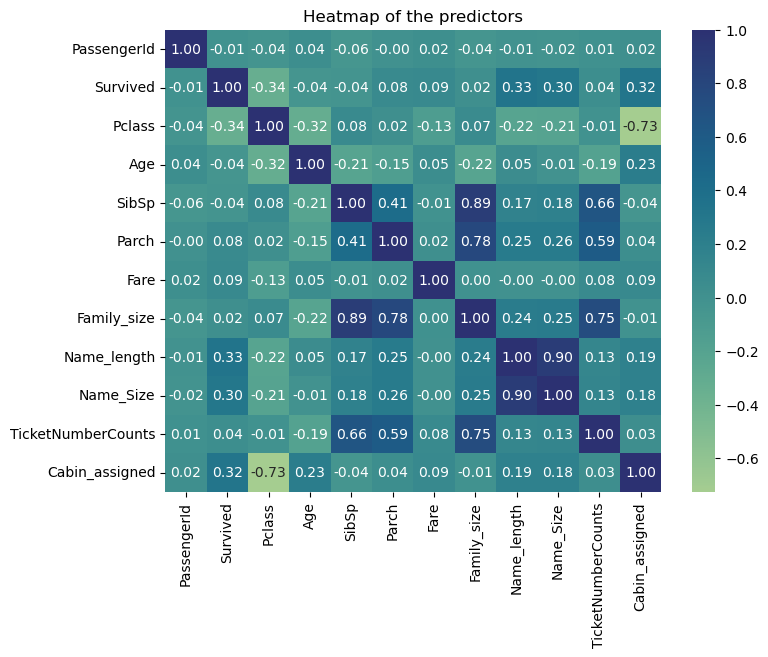

In [154]:
plt.figure(figsize=(8, 6))
sns.heatmap(train_df.corr(numeric_only = True), annot=True, cmap="crest", fmt= ".2f")
plt.title('Heatmap of the predictors')
plt.show()

In [53]:
ohe = OneHotEncoder(sparse_output = False)
ode = OrdinalEncoder()
SI = SimpleImputer(strategy = 'most_frequent')

In [54]:
ohe_cols = ['Family_size_grouped']
ode_cols = ['Sex','Embarked']

In [73]:
X = train_df.drop(['Survived'], axis= 1)
y = train_df['Survived']
X_test = test_df.drop(['Age_cut','Fare_cut'], axis= 1)

In [74]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size= 0.2, random_state = 7)

In [75]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value = -1))
])

In [76]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy = 'most_frequent')),
    ('one-Hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output = False))
])

In [77]:
col_trans = ColumnTransformer(transformers = [
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
    ('passthrough', 'passthrough', ['Pclass','TicketNumberCounts', 'Cabin_assigned', 'Name_Size', 'Age', 'Fare']),
    ],
    remainder = 'drop',
    n_jobs  = -1) 

In [78]:
rfc = RandomForestClassifier()

In [79]:
param_grid = {'max_depth': [8,9,10,15,20],
             'min_samples_leaf': [1,2,4],
             'min_samples_split': [5,10,15],
             'n_estimators': [100,150,200],
             'criterion': ['gini','entropy']
             }

In [80]:
Cv_rfc = GridSearchCV(estimator=rfc, param_grid = param_grid, cv=StratifiedKFold(n_splits=5))

In [81]:
pipefinalrfc = make_pipeline(col_trans, Cv_rfc)
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Sex', 'Embarked']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=...
                                                   'TicketNumberCounts',
                                                   'Cabin_assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [8, 9, 10, 15, 20],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [100, 150, 200]}))])

In [82]:
print(Cv_rfc.best_params_)
print(Cv_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 100}
0.8455333398995372


In [145]:
dtc = DecisionTreeClassifier()

In [146]:
param_grid = {'max_depth': [10,20,30],
             'min_samples_leaf': [1,2,4],
             'min_samples_split': [5,10,15],
             'criterion': ['gini','entropy']
             }

In [147]:
Cv_dtc = GridSearchCV(estimator=dtc, param_grid = param_grid, cv=StratifiedKFold(n_splits=5))

In [148]:
pipefinaldtc = make_pipeline(col_trans, Cv_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Sex', 'Embarked']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [87]:
print(Cv_dtc.best_params_)
print(Cv_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 15}
0.8287501231163203


In [88]:
knn = KNeighborsClassifier()

In [89]:
param_grid = {'n_neighbors': [3,5,7,9,11],
             'weights': ["uniform", "distnce"],
             'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
             'p': [1,2]
             }

In [94]:
Cv_knn = GridSearchCV(estimator = knn, param_grid = param_grid, cv=StratifiedKFold(n_splits=5))

In [95]:
pipefinalknn = make_pipeline(col_trans, Cv_knn)
pipefinalknn.fit(X_train, y_train)

C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\neighbors\_classification.py", line 213, in fit
    self._validate_params()
  File "C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\HP\AnacondaX\Lib\site-packages\s

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Sex', 'Embarked']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform', 'distnce']}))])

In [113]:
print(Cv_knn.best_params_)
print(Cv_knn.best_score_)

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
0.8047572146163695


In [103]:
svc = SVC()

In [100]:
param_grid = {'C': [100,10,1.0,0.1,0.001,0.001],
             'kernel': ["linear", "poly","rbf","sigmoid"]
             }

In [101]:
Cv_svc = GridSearchCV(estimator = svc, param_grid = param_grid, cv=StratifiedKFold(n_splits=5))

In [102]:
pipefinalsvc = make_pipeline(col_trans, Cv_svc)
pipefinalsvc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Sex', 'Embarked']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=...
                                                                                 sparse_output=False))]),
                                                  ['Family_size_grouped']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [114]:
print(Cv_svc.best_params_)
print(Cv_svc.best_score_)

{'C': 100, 'kernel': 'rbf'}
0.8230375258544272


In [116]:
lr = LogisticRegression()

In [117]:
param_grid = {'C': [100,10,1.0,0.1,0.001]
             }

In [126]:
Cv_lr = GridSearchCV(estimator = lr, param_grid = param_grid, cv=StratifiedKFold(n_splits=5))

In [133]:
pipefinallr = make_pipeline(col_trans, Cv_lr)
pipefinallr.fit(X_train, y_train)

C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AnacondaX\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Sex', 'Embarked']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Family_size_grouped']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001]}))])

In [134]:
print(Cv_lr.best_params_)
print(Cv_lr.best_score_)

{'C': 100}
0.8272431793558555


In [139]:
gnb = GaussianNB()

In [140]:
param_grid = {'var_smoothing': [0.00000001,0.000000001,0.00000001]
             }

In [141]:
Cv_gnb = GridSearchCV(estimator = gnb, param_grid = param_grid, cv=StratifiedKFold(n_splits=5))

In [142]:
pipefinalgnb = make_pipeline(col_trans, Cv_gnb)
pipefinalgnb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Sex', 'Embarked']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Family_size_grouped']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass',
                                                   'TicketNumberCounts',
                                                   'Cabin_assigned',
                                                   'Name_Size', 'Age',
                                                   'Fare'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-09,
                                                            1e-08]}))])

In [143]:
print(Cv_gnb.best_params_)
print(Cv_gnb.best_score_)

{'var_smoothing': 1e-08}
0.7696542893725993


In [158]:
xg = XGBClassifier()

In [155]:
param_grid = {'booster': ['gbtree','gblinear','dart']
             }

In [159]:
Cv_xg = GridSearchCV(estimator = xg, param_grid = param_grid, cv=StratifiedKFold(n_splits=5))

In [160]:
pipefinalxg = make_pipeline(col_trans, Cv_xg)
pipefinalxg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Sex', 'Embarked']),
                                                 ('ohe_pipeline',
                                                  Pipeline(steps=...
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                              param_grid={'booster': ['gbtree', 'gblinear',
                                                      'dart']}))])

In [161]:
print(Cv_xg.best_params_)
print(Cv_xg.best_score_)

{'booster': 'gblinear'}
0.8272333300502315


In [162]:
y_pred = pipefinalrfc.predict(X_test)
y_pred2 = pipefinaldtc.predict(X_test)
y_pred3 = pipefinalknn.predict(X_test)
y_pred4 = pipefinalsvc.predict(X_test)
y_pred5 = pipefinallr.predict(X_test)
y_pred6 = pipefinalgnb.predict(X_test)
y_pred7 = pipefinalxg.predict(X_test)

In [163]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred
})

submission2 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred2
})

submission3 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred3
})

submission4 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred4
})

submission5 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred5
})

submission6 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred6
})

submission7 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred7
})

In [164]:
submission.to_csv("submissionML_1.csv", index = False)
submission2.to_csv("submissionML_2.csv", index = False)
submission3.to_csv("submissionML_3.csv", index = False)
submission4.to_csv("submissionML_4.csv", index = False)
submission5.to_csv("submissionML_5.csv", index = False)
submission6.to_csv("submissionML_6.csv", index = False)
submission7.to_csv("submissionML_7.csv", index = False)